# 과제 1: 데이터 알아보기

## 1-1. 데이터 로드
AB_NYC_2019.csv 데이터 파일을 데이터 프레임 형태로 로드하여 df 변수에 저장합니다.

In [227]:
import pandas as pd
import seaborn as sns

In [221]:
df = pd.read_csv('./AB_NYC_2019.csv')

## 1-2. 데이터 탐색 및 전처리
- 로드한 데이터 일부를 살펴보고, 각 컬럼별 통계값을 뽑습니다.
- 결측치가 있다면 적절한 방법으로 처리합니다.

결측치 데이터가 있는지 확인함.  
isna을 통해 확인해본 결과 NaN 값은 없는 것으로 보임.

In [220]:
df.dropna(inplace=True)
df.isna().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

데이터프레임의 5개 출력

In [223]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


아래에서 확인할 수 있듯이, 10개의 가격(price)이 0인 데이터들이 존재함.  
코로나 팬데믹이 2019년에 찾아왔으므로, 가격이 0인 항목은 무료로 숙소를 제공한 항목들로 해석함.  
따라서 price가 0인 데이터를 drop하지 않음.  

In [222]:
len(df[df['price']==0])

11

각 컬럼별 통계값을 출력함.

In [226]:
print(df.describe(include='all')) # 숫자형, 문자형 모두 보기 include = 'all'

                  id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47905           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       417   
mean    1.901714e+07             NaN  6.762001e+07       NaN   
std     1.098311e+07             NaN  7.861097e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.471945e+06             NaN  7.822033e+06       NaN   
50%     1.967728e+07             NaN  3.079382e+07       NaN   
75%     2.915218e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
unique                   5           221           NaN           NaN   
top            

## 1-3. 기술 통계 및 시각화
- 가격 (price) 컬럼에 대한 분포 파악을 위해, 기술 통계값을 뽑고 및 시각화 도구를 사용하여 그림을 그립니다.

describe 사용하는 것 대신 가격에 대한 평균, 분산, 중앙값, 최빈값, 최소값, 최대값을 계산하고 출력해봄.  
describe를 사용한 기술통계값 출력도 해봄.

In [224]:
price_mean = df['price'].mean()
price_std = df['price'].std()
price_median = df['price'].median()
price_mode = df['price'].mode()
price_min = df['price'].min()
price_max = df['price'].max()


print(f'mean : {price_mean}')
print(f'median : {price_median}')
print(f'std : {price_std}')
print(f'mode : {price_mode}')
print(f'min : {price_min}')
print(f'max : {price_max}')
print()

#아래는 describe 메소드를 통한 기술 통계값 출력
print(df['price'].describe(include='all'))


mean : 152.7206871868289
median : 106.0
std : 240.15416974718758
mode : 0    100
Name: price, dtype: int64
min : 0
max : 10000

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [225]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


단순히 시각화하면 아래와 같이 할 수 있음. 그러나 보기에 쉽지 않음.

<Axes: xlabel='price', ylabel='Count'>

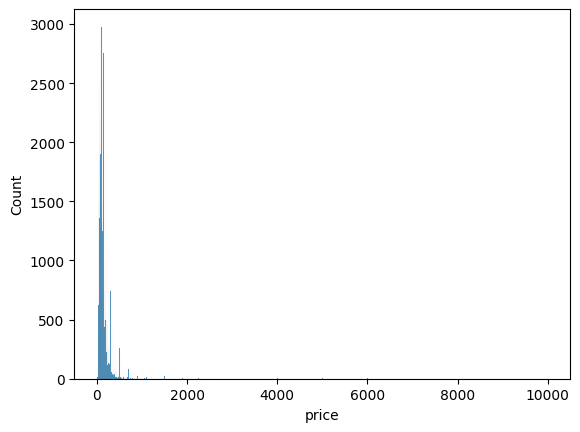

In [235]:
sns.histplot(data=df, x='price')

<Axes: >

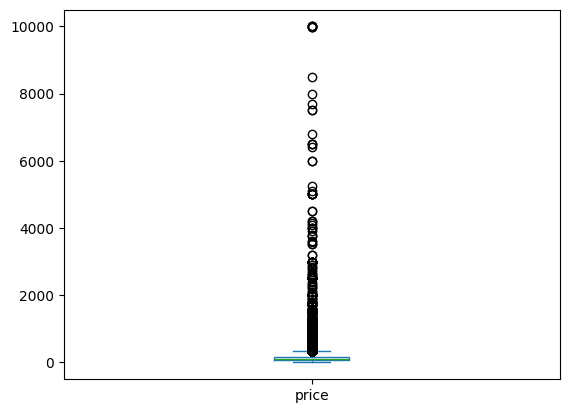

In [231]:
df['price'].plot(kind='box')

위의 시각화는 보기에 불편하여 아래의 시각화를 제시함.  
1-6. 자유해석에서도 시각화하지만 여기서 미리 시각화함.  
아래는 neighbourhood_group 별 방의 종류(room_type)별 가격을 나타냄

Text(0.5, 1.0, 'expensive area?')

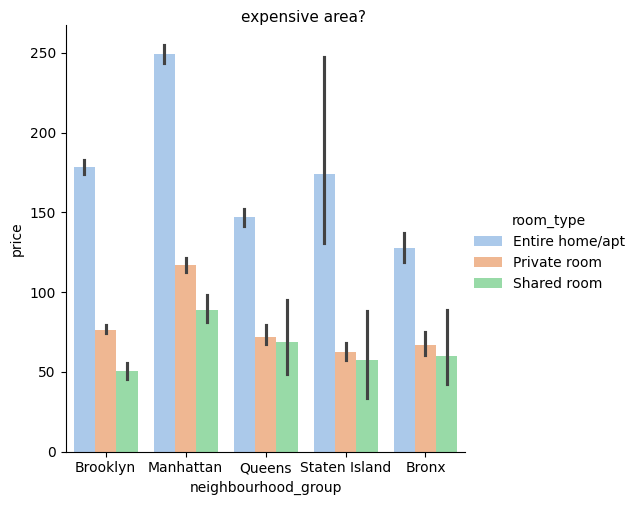

In [229]:
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type', hue_order=['Entire home/apt', 'Private room', 'Shared room'],palette='pastel')
fig2.fig.suptitle('expensive area?',fontsize=11,y=1.0)

## 1-4. 기술 통계 및 시각화
- 가격과 리뷰 수(number of reviews) 간의 관계를 살펴보기 위해, 관련된 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그립니다.

In [234]:
print(df['number_of_reviews'].describe(include='all'))

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


데이터 속성들간 상관계수를 계산한 후에 히트맵으로 시각화함.

In [228]:
corr_matrix = df.drop(['id', 'latitude','longitude', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'],axis=1).corr()

<Axes: >

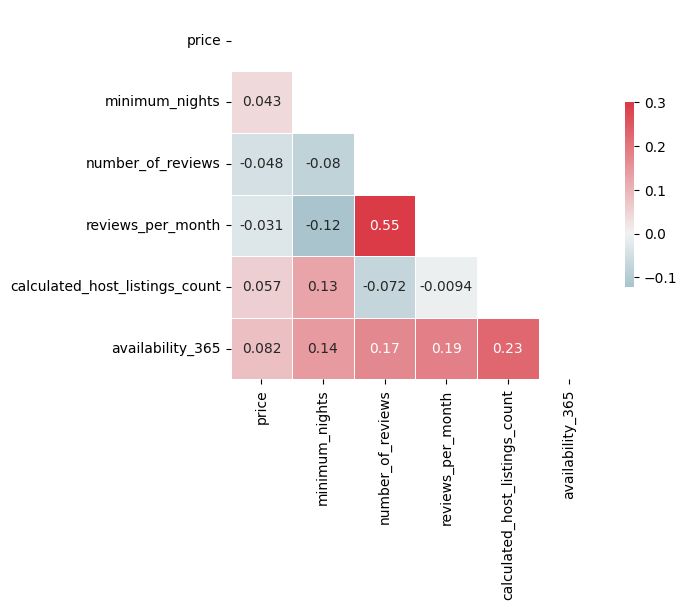

In [230]:
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

가격(price) 리뷰 수(number_of_reviews) 간의 피어슨 상관계수는 -0.036임을 확인할 수 있음.  
위의 상관계수 계산 결과값으로는 관계성이 높다고는 판단할 수 없음.  

x 축을 리뷰 수, y 축을 가격으로 하여 산점도 출력해봄.

<Axes: xlabel='number_of_reviews', ylabel='price'>

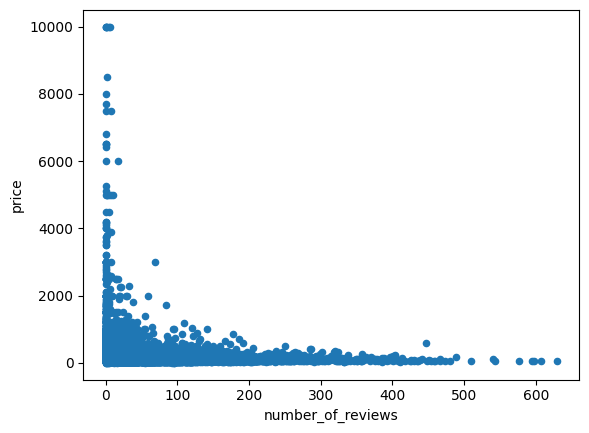

In [232]:
df.plot(x='number_of_reviews',y='price', kind='scatter')

## 1-5. 기술 통계 및 시각화
- neighborhood group과 가격의 관계를 알아보기 위해, 그룹별 가격의 분포에 대한 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그려봅니다.

In [244]:
# 그룹별로 묶은 데이터프레임
df_g = df.groupby(['neighbourhood_group'])
# 그룹별 가격의 분포에 대한 기술 통계값 출력
df_g['price'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


x 축을 지역그룹, y 축을 가격으로 하여 산점도를 출력해봄.  
다른 그룹보다 Staten Island, Bronx 의 최고 가격이 낮음. 위의 통계 값에서도 확인 가능.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

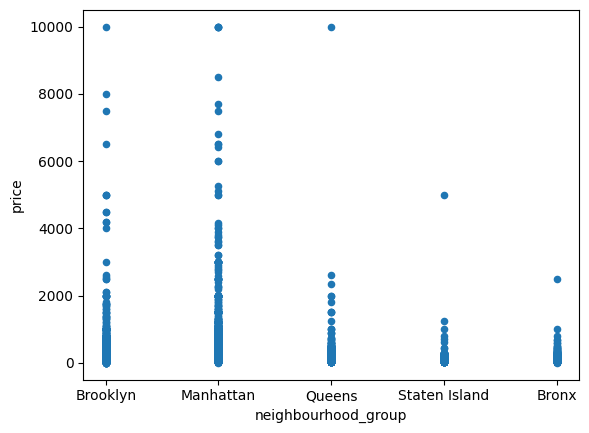

In [236]:
df.plot(x='neighbourhood_group',y='price', kind='scatter')

neighbourhood group별 방 가격들의 평균을 비교해보기 위해 neighbourhood group 별 가격 평균 비교함.  
가격 평균은 Manhatten이 가장 높게 나옴.  

<Axes: xlabel='neighbourhood_group'>

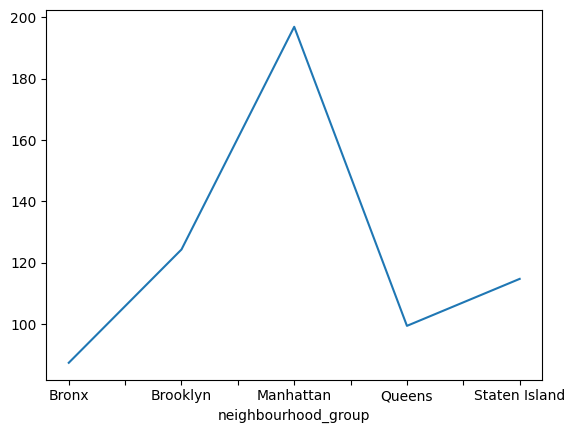

In [251]:
df_g['price'].mean().plot()

## 1-6. 그룹별 특징 자유 분석

- neighborhood group 에 따라 어떤 특징이 있는지 자유롭게 분석하고 결과의 의미를 해석하여 제시합니다.

#### 해석 1. neighbourhood_group에 따른 위도, 경도로 산점도 시각화했을 때의 의미

먼저 neighbourhood group에 따라 longtitude와 latitude 정보를 이용하여 산점도를 시각화 해봄.  
neighbourhood group은 색으로 구분됨.  
가격에 따라 점의 크기가 다르게 함.  

<Axes: xlabel='longitude', ylabel='latitude'>

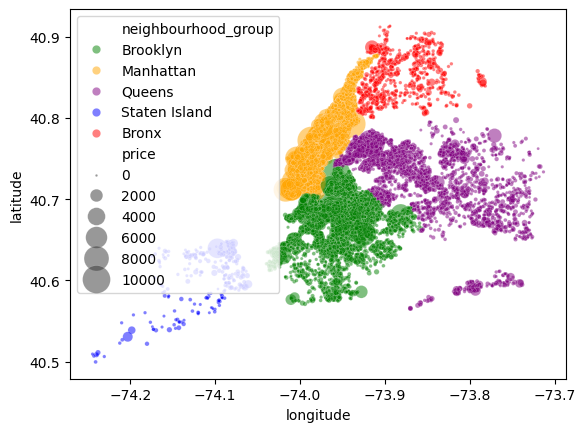

In [233]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', size="price",
            sizes=(3, 400), palette=['green','orange','purple','blue','red'], alpha=0.5)

위의 위도와 경도를 x, y축으로 하여 산점도를 그리면 각 지역 그룹의 위치와 가격 정보를 한눈에 볼 수 있었음.  
산점도에서 보이는 각 neghbourhood_group별 점들이 이루는 모양이 뉴욕의 각 구역 모양과 유사함.  
실제 뉴욕의 지도 이미지와 비교해보니 구역 구분이 일치함.  
그러나 데이터가 많아서 가격을 보기에는 불편함이 있음.  

----

### 해석 2. availability_365에 대한 해석과 의미

availability_365 = 0은 아래 두 가지로 해석해볼 수 있음.
* 1. 목록이 제거되었을 때
* 2. 방이 예약되었을 때

2019년도 기준 데이터셋이므로  
데이터셋에서 1에 해당 되는 데이터를 제거하기 위해 2019년에 적어도 하나의 리뷰가 있을 때 availability_365가 0인 데이터들을 선택하여 남김.  
review_year이 2019년이 아니면서 availability_365이 0인 가용성의 데이터는 제외함.  

In [238]:
df_preproc = df.copy()

df_preproc['last_review'] = pd.to_datetime(df_preproc['last_review'])
df_preproc['review_year'] = df_preproc['last_review'].apply(lambda last_review:last_review.year)
df_preproc['review_year'] = df_preproc['review_year'].fillna(0)
df_preproc['review_year'] = df_preproc['review_year'].astype(int)
df_preproc = pd.concat([df_preproc[(df_preproc['availability_365']==0) & (df_preproc['review_year']==2019)], df_preproc[df_preproc['availability_365']>0]])

reviews_per_month의 NA 데이터는 last_reviews 데이터가 없기 때문에 reviews가 전혀 없음을 시사함.  
따라서 NA 데이터를 0으로 채움.  
reviews_per_month 열의 NA 데이터 0으로 채우기  

In [237]:
df_preproc['reviews_per_month'] = df_preproc['reviews_per_month'].fillna(0)

데이터 처리 전

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

데이터 처리 후

In [246]:
df_preproc.info()
df_preproc.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 34450 entries, 132 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              34450 non-null  int64         
 1   name                            34446 non-null  object        
 2   host_id                         34450 non-null  int64         
 3   host_name                       34440 non-null  object        
 4   neighbourhood_group             34450 non-null  object        
 5   neighbourhood                   34450 non-null  object        
 6   latitude                        34450 non-null  float64       
 7   longitude                       34450 non-null  float64       
 8   room_type                       34450 non-null  object        
 9   price                           34450 non-null  int64         
 10  minimum_nights                  34450 non-null  int64         
 11  numbe

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_year
count,3.445000e+04,3.445000e+04,34450.000000,34450.000000,34450.000000,34450.000000,34450.000000,29243,29243.000000,34450.000000,34450.000000,34450.000000
mean,2.113167e+07,7.983464e+07,40.728255,-73.949403,158.453991,7.966212,30.797533,2019-03-22 12:36:21.937557760,1.743975,9.564296,160.070914,1713.647402
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-04-25 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,1.216791e+07,8.481125e+06,40.688633,-73.983190,70.000000,2.000000,2.000000,2019-04-18 00:00:00,0.430000,1.000000,32.000000,2018.000000
50%,2.284311e+07,3.993048e+07,40.723200,-73.954330,110.000000,3.000000,10.000000,2019-06-13 00:00:00,1.140000,1.000000,141.000000,2019.000000
75%,3.104453e+07,1.400573e+08,40.762887,-73.931263,184.000000,5.000000,37.000000,2019-06-27 00:00:00,2.570000,3.000000,292.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000,2019.000000
std,1.133844e+07,8.579000e+07,0.056094,0.050391,244.551067,22.952423,50.446386,NaN,1.771300,38.933375,130.456585,723.120642


처리 과정 후 누락 데이터 확인

In [241]:
df_preproc.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5207
reviews_per_month                 5207
calculated_host_listings_count       0
availability_365                     0
review_year                          0
dtype: int64

Text(0.5, 1.0, 'popular room?')

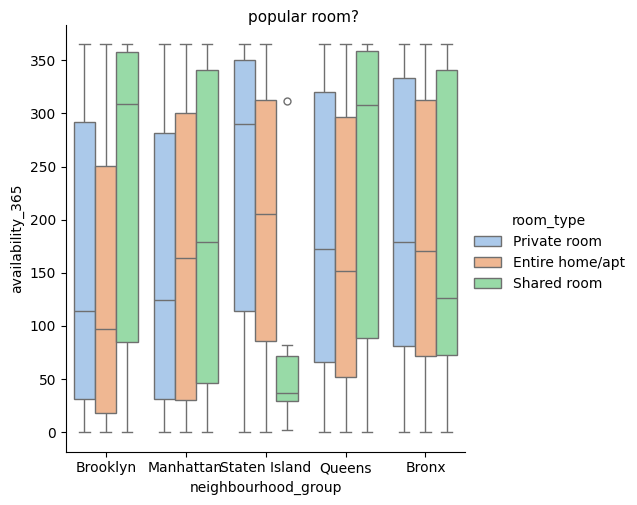

In [240]:
# Availability according to different room_type in different areas
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=df_preproc,palette='pastel')
fig.fig.suptitle('popular room?',fontsize=11,y=1.)

위에서 Staten ISland의 Shared room은 availability_365가 대체로 적은 것을 보아 인기 많은 편이라고 해석할 수 있음.  
Brooklyn의 Entire home/apt 또한 지역의 Entire hme/apt에 비해 대체적으로 availiability_365가 적으므로 인기가 많은 편이라고 해석됨. 

----

#### 해석 3. neighbourhood group별 룸 종류에 따른 가격 비교

<Axes: xlabel='neighbourhood_group', ylabel='price'>

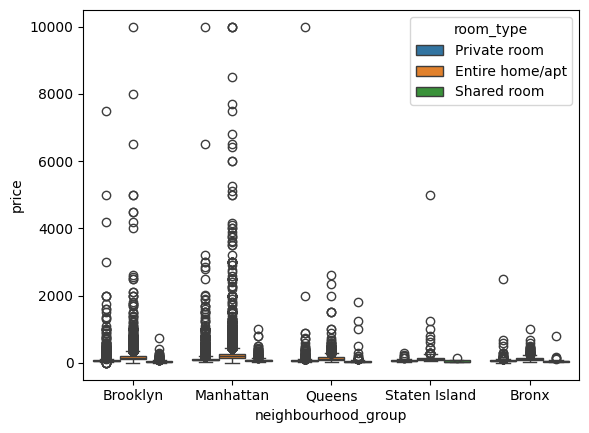

In [243]:
sns.boxplot(y='price', x='neighbourhood_group', hue='room_type', data=df)

outlier값으로 인해 box plot을 보기가 쉽지 않음.  
IQR 계산을 한 후에 이를 이용하여 outlier을 필터링함.

In [242]:
q1=df['price'].quantile(0.25)
q2=df['price'].quantile(0.5)
q3=df['price'].quantile(0.75)

iqr = q3 - q1
print(iqr)

filtered = df.query('(@q1 - 1.5 * @iqr) <= price <= (@q3 + 1.5 * @iqr)')

106.0


필터링을 거친 후, box plot으로 시각화함.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

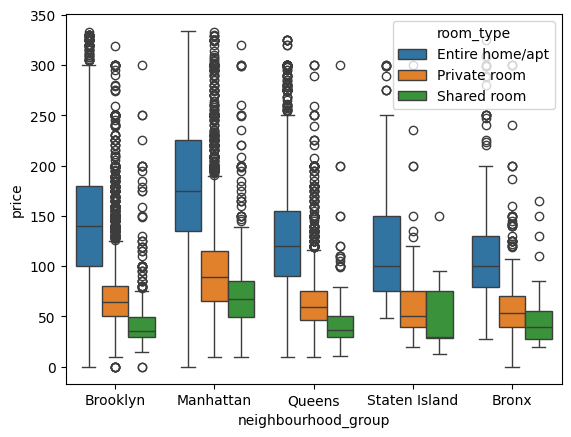

In [245]:
sns.boxplot(y='price', x='neighbourhood_group', hue='room_type', hue_order=['Entire home/apt', 'Private room', 'Shared room'], data=filtered)

IQR 값을 이용한 필터링을 거친 이후 시각화를 해보면 맨하탄의 평균 가격이 가장 높음.  
브루클린, 맨해튼, 퀸즈를 보면 Entire home/apt, Private room, Shared room 순의 비슷한 가격구조를 가짐.  

룸 종류별 가격에 대한 정보를 보다 더 파악하기 위해  
위의 박스 플롯뿐만 아니라 IQR 필터링을 거치지 않은 데이터에 대해 바 플룻으로 시각화를 하여봄

Text(0.5, 1.0, 'expensive area?')

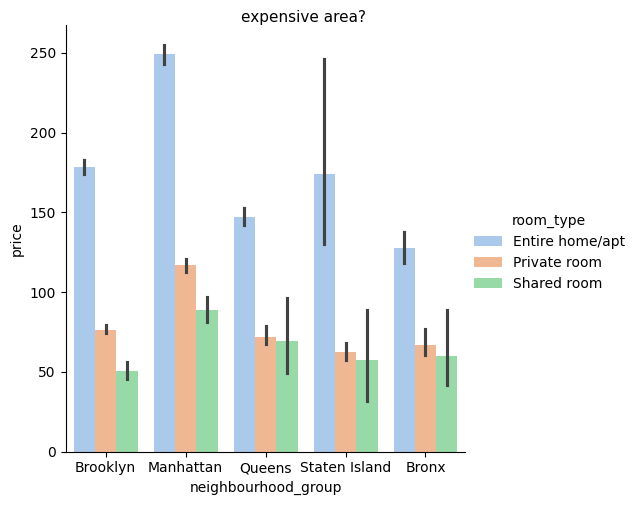

In [252]:
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type', hue_order=['Entire home/apt', 'Private room', 'Shared room'],palette='pastel')
fig2.fig.suptitle('expensive area?',fontsize=11,y=1.0)

위의 바플롯에서도 맨하탄이 대체적으로 가격이 다른 지역에 비해 더 높은 것을 볼 수 있음.  
위의 바플롯에서도 브루클린, 맨해튼, 퀸즈를 보면 Entire home/apt, Private room, Shared room 순의 비슷한 가격구조를 가진 것을 확인할 수 있음.

----